___

# ERROR - TREND - SEASONALITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


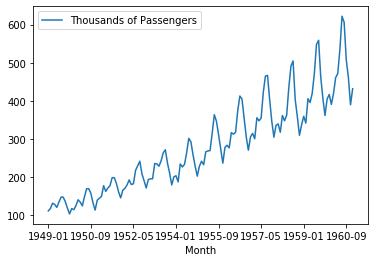

In [4]:
airline.plot()

## ETS

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

In [5]:
# Get data in correct format
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


Residual è la parte che non è spiegabile ne dalla seasonality ne dal trend

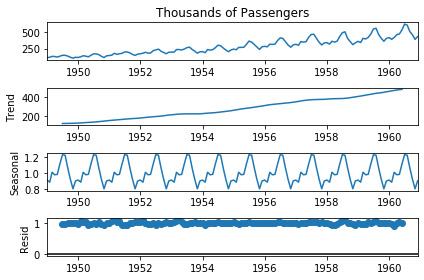

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
# usiamo "multiplicative" perchè il trend sembra più moltiplicativo/esponenziale
# se nella figura sopra avessimo visto qualcosa di più lineare potevamo usare "additive"
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
fig = result.plot()
# il primo plot schiacchiato è identico a quello delle celle sopra, semplicemente è più schiacciato
# residual = error

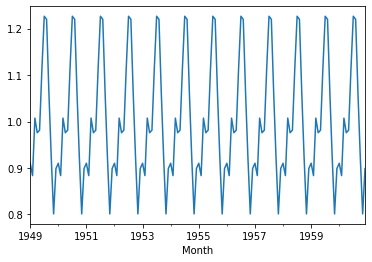

In [8]:
result.seasonal.plot()

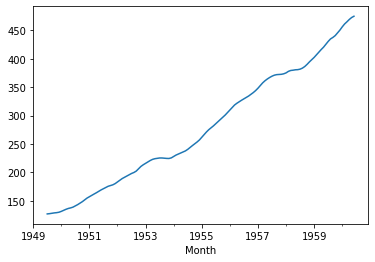

In [9]:
result.trend.plot()

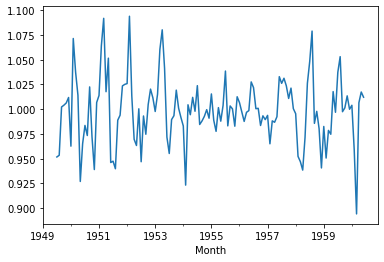

In [12]:
result.resid.plot()